<a href="https://colab.research.google.com/github/velavalururajithasai/ml_dl/blob/master/EXERCISE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
#Loading the dataset
data_set=pd.read_csv("/content/sample_data/Breast_Cancer.csv")
data_set

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


In [4]:
#Extracting x and y Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values
print(x)
print(y)


[[ 1  1]
 [ 4  4]
 [ 1  1]
 ...
 [10 10]
 [ 8  6]
 [ 8  8]]
[ 1  5  1  1  3  8  1  1  1  1  1  1  3  1 10  4  1  1  6  1 10  3  1  1
  1  4  1  1  1  1  1  1  3  2  1  1  8  1  9  3  9  1  2  6  4  1  4  1
  3  2  1  4  2  8  6  3  1  1  1  2  5  1  1  1  1  1  1  1  3  1  1  8
  2 10  1  1  1  2  1  1  1  2  1  1  8  1  4  6  1  2  1  2  1  1  1  1
  2  1  2 10  1  4  1  1 10  4  8 10  1  4  2  3 10  3  1  1  1 10  1  1
  2  1  2  1  7  1  7  1  4  1  1  1 10  1  1  1  1  1  1  1  1  1  4  1
  1  1  2  1  3  4  1  1  6  1  1  6  1  1  1  3  4  1  1  2  1  1  8 10
  1  2  1  1  1 10  4  7  1  3  1  3  1  1  1  8  4  1  6 10 10  1  8 10
  1  1  1  1  5  4  1  1  5  4  1  1  1  9  3  1  1  1 10  8  1 10 10  7
  1  1  7  1  2  3  3  3  6  1  4  5  1  3  4  5  3  5  1  1  2  5  8  2
  3  3  1  1  1  2  8  1  1  1  1 10  5  2  1  2  1  1  1  1 10  6  4 10
 10  1  3  2  2  1  1  1  2  1  1  1  1  1  1  3  1  2 10  1 10 10 10  1
  1  8  1  1  1  6  1  8  3  1  1  6  5  1  7  1  9  4  1  1  6 

Text(0, 0.5, 'feature2')

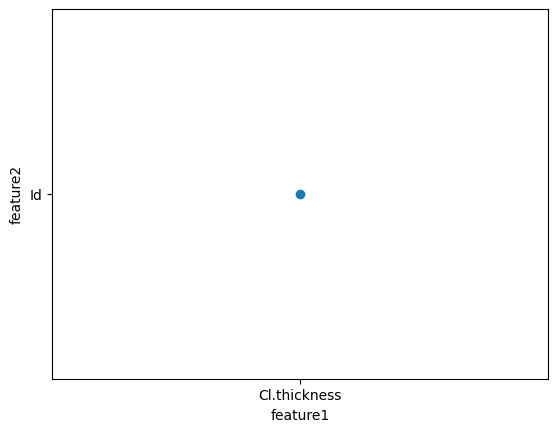

In [5]:
#visualize the dataset
plt.scatter('Cl.thickness','Id')
plt.xlabel('feature1')
plt.ylabel('feature2')


In [6]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [7]:
#feature Scaling
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
print(x_train)
print(x_test)

[[ 2.21279217  0.26790687]
 [-0.68596557 -0.39584348]
 [ 2.21279217  2.2591579 ]
 ...
 [-0.68596557 -0.72771865]
 [-0.68596557 -0.72771865]
 [-0.68596557 -0.72771865]]
[[-0.68596557 -0.39584348]
 [-0.36388138 -0.39584348]
 [ 0.92445539  0.93165721]
 [-0.68596557 -0.72771865]
 [ 1.24653959  0.59978204]
 [-0.68596557 -0.72771865]
 [ 2.21279217  0.93165721]
 [-0.68596557 -0.72771865]
 [ 0.28028701  0.26790687]
 [-0.36388138 -0.06396831]
 [-0.68596557 -0.72771865]
 [-0.68596557 -0.72771865]
 [ 1.24653959  1.59540756]
 [ 0.92445539  0.26790687]
 [ 2.21279217  0.93165721]
 [-0.68596557 -0.72771865]
 [-0.68596557 -0.72771865]
 [ 1.24653959  1.59540756]
 [ 1.56862378  0.93165721]
 [-0.68596557 -0.72771865]
 [ 0.92445539  0.93165721]
 [ 2.21279217  2.2591579 ]
 [-0.68596557 -0.72771865]
 [-0.68596557 -0.72771865]
 [ 0.28028701 -0.39584348]
 [ 0.92445539  1.26353238]
 [-0.68596557 -0.72771865]
 [-0.68596557 -0.72771865]
 [ 0.6023712   2.2591579 ]
 [ 0.28028701  0.26790687]
 [-0.36388138 -0.39584

In [8]:
#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [9]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

In [10]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[90  0  0  1  0  0  0  1  0  4]
 [13  1  0  2  1  0  0  1  0  3]
 [10  2  0  1  1  1  0  3  0  2]
 [ 2  0  0  1  0  1  0  1  0  0]
 [ 0  1  0  2  1  1  0  0  0  1]
 [ 1  0  0  2  0  0  0  1  0  2]
 [ 0  0  0  2  2  0  0  0  0  1]
 [ 1  0  0  1  0  1  0  0  0  1]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 2  2  1  2  0  0  0  0  0  4]]


In [11]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.5542857142857143

In [15]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_logreg = logreg_model.predict(X_test_scaled)

# Compute the accuracy
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)

# Compute the confusion matrix
confusion_matrix_logreg = confusion_matrix(Y_test, Y_pred_logreg)

# Print the results
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix_logreg)

Logistic Regression Accuracy: 0.9736842105263158
Logistic Regression Confusion Matrix:
[[41  2]
 [ 1 70]]
